In [1]:
import pandas as pd

In [2]:
df_bagerhat = pd.read_csv('Bagerhat_historical_weather_1980_2024.csv')

# for Heat Index 
here we are taking temperature and humidity so that data doesn't leak while training models

In [3]:
df_bagerhat.info()
df_bagerhat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       16437 non-null  object 
 1   day                            16437 non-null  int64  
 2   month                          16437 non-null  int64  
 3   year                           16437 non-null  int64  
 4   temperature(degree C)          10478 non-null  float64
 5   feels_like(degree C)           10478 non-null  float64
 6   max_temperature(degree C)      14991 non-null  float64
 7   minimum_temperature(degree C)  14991 non-null  float64
 8   humidity                       10478 non-null  float64
 9   precipitation                  5479 non-null   float64
 10  windspeed                      11924 non-null  float64
 11  atmospheric_pressure           7115 non-null   float64
 12  UV                             4038 non-null  

,district,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
0,Bagerhat,1,1,1980,21.7,21.7,26.1,18.1,77.1,NaN,3.6,1013.0,NaN,NaN,17.1
1,Bagerhat,2,1,1980,20.8,20.8,25.1,15.1,64.4,NaN,5.4,1012.9,NaN,NaN,13.3
2,Bagerhat,3,1,1980,23.0,23.0,26.1,16.6,60.2,NaN,16.6,1013.0,NaN,NaN,14.1
3,Bagerhat,4,1,1980,22.3,22.3,26.1,16.1,70.4,NaN,18.4,1014.2,NaN,NaN,16.3
4,Bagerhat,5,1,1980,22.1,22.1,26.1,18.1,67.8,NaN,11.2,1015.1,NaN,NaN,15.5


# find the number of datasets for temperature and humidity in the dataset

In [4]:
# find the number of temperature and humidity in the dataset
df_bagerhat_temperature= df_bagerhat['temperature(degree C)'].count()
print (f"temperature(degree C) has : {df_bagerhat_temperature}")

df_bagerhat_humidity= df_bagerhat['humidity'].count()
print (f"humidity has : {df_bagerhat_humidity}")

temperature(degree C) has : 10478
humidity has : 10478


# Features for HI

In [5]:
desired_colmn = ['day', 'month', 'year', 'temperature(degree C)', 'humidity']
HI_df_bagerhat = df_bagerhat[desired_colmn]

HI_df_bagerhat.head()

,day,month,year,temperature(degree C),humidity
0,1,1,1980,21.7,77.1
1,2,1,1980,20.8,64.4
2,3,1,1980,23.0,60.2
3,4,1,1980,22.3,70.4
4,5,1,1980,22.1,67.8


In [6]:
with_no_null_HI = HI_df_bagerhat.dropna()
print(f"After removing missing values from bagerhat, dataset contains {with_no_null_HI.shape[0]} rows and {with_no_null_HI.shape[1]} columns out of {df_bagerhat.shape[0]} rows.")
with_no_null_HI.head()

After removing missing values from bagerhat, dataset contains 10478 rows and 5 columns out of 16437 rows.


,day,month,year,temperature(degree C),humidity
0,1,1,1980,21.7,77.1
1,2,1,1980,20.8,64.4
2,3,1,1980,23.0,60.2
3,4,1,1980,22.3,70.4
4,5,1,1980,22.1,67.8


# count zeroes and drop it 

In [7]:

# count zeros per column and show as a table
zeros_per_col = (with_no_null_HI == 0).sum()
zeros_df = zeros_per_col.to_frame(name='zero_count')
zeros_df['zero_percentage'] = (zeros_df['zero_count'] / len(with_no_null_HI) * 100).round(2)
zeros_df = zeros_df[zeros_df['zero_count'] > 0].sort_values('zero_count', ascending=False)

print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)

# drop rows that contain any 0 or 0.0 and update with_no_null_HI
rows_before = with_no_null_HI.shape[0]
with_no_null_HI = with_no_null_HI[(with_no_null_HI != 0).all(axis=1)]
rows_after = with_no_null_HI.shape[0]
print(f"Dropped {rows_before - rows_after} rows containing zero values. New shape: {with_no_null_HI.shape}")

Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


Dropped 0 rows containing zero values. New shape: (10478, 5)


# time series anaysis

Date range: 1980-01-01 to 2024-12-31


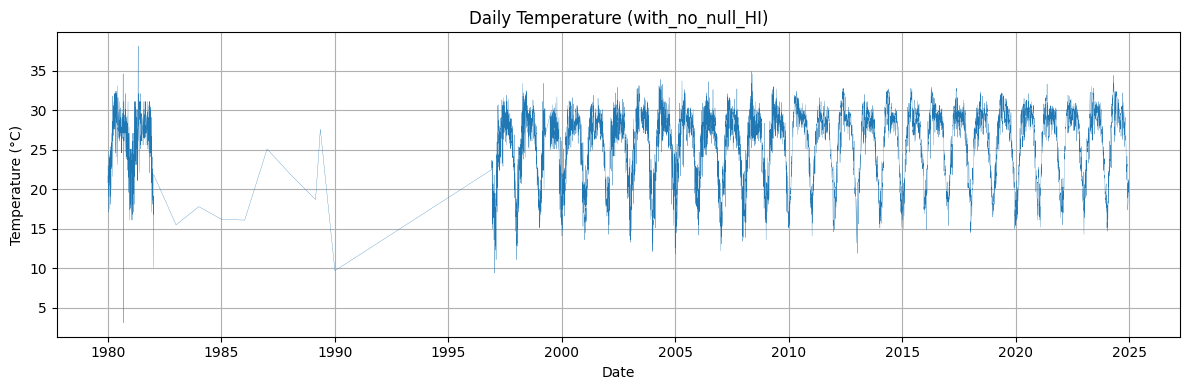

C:\Users\Khalid\AppData\Local\Temp\ipykernel_9228\1663535528.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = with_no_null_HI.set_index('date')['temperature(degree C)'].resample('M').mean()


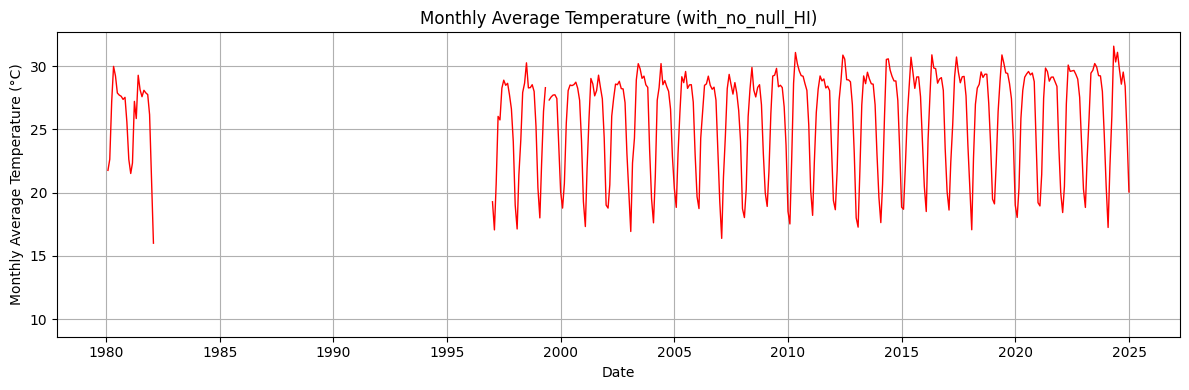

In [8]:
import matplotlib.pyplot as plt

# ensure a datetime column exists
if 'date' not in with_no_null_HI.columns:
    with_no_null_HI['date'] = pd.to_datetime(with_no_null_HI[['year', 'month', 'day']])

# show date range
min_date = with_no_null_HI['date'].min()
max_date = with_no_null_HI['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# plot daily temperature time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['temperature(degree C)'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature (with_no_null_HI)')
plt.grid(True)
plt.tight_layout()
plt.show()

# plot monthly average temperature to show trend
monthly_avg = with_no_null_HI.set_index('date')['temperature(degree C)'].resample('M').mean()
plt.figure(figsize=(12, 4))
plt.plot(monthly_avg.index, monthly_avg.values, color='red', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Monthly Average Temperature (°C)')
plt.title('Monthly Average Temperature (with_no_null_HI)')
plt.grid(True)
plt.tight_layout()
plt.show()

# calculating heat index

In [9]:
temp_col = 'temperature(degree C)'
hum_col = 'humidity'

def calculate_heat_index(temperature_c, humidity):    
    t_c = float(temperature_c)
    h = float(humidity)

    # If humidity is a fraction (0..1), convert to percent
    if 0.0 <= h <= 1.0:
        h = h * 100.0

    # Convert °C -> °F: $F = \\frac{9}{5}C + 32$
    t_f = t_c * 9.0/5.0 + 32.0

    # Simple approximation:
    hi = 0.5 * (t_f + 61.0 + ((t_f - 68.0) * 1.2) + (h * 0.094))
    # Full NWS formula if applicable:
    if hi >= 80.0:
        T = t_f; R = h
        hi = (-42.379 + 2.04901523 * T + 10.14333127 * R
              - 0.22475541 * T * R - 6.83783e-3 * T**2
              - 5.481717e-2 * R**2 + 1.22874e-3 * T**2 * R
              + 8.5282e-4 * T * R**2 - 1.99e-6 * T**2 * R**2)

    # Convert back to °C: $C = \\frac{5}{9}(F - 32)$
    hi_c = (hi - 32.0) * 5.0/9.0
    return hi_c

with_no_null_HI['heat_index_C'] = with_no_null_HI.apply(
    lambda r: calculate_heat_index(r[temp_col], r[hum_col]), axis=1)
# ...existing code...
with_no_null_HI['heat_index_C'].info()
with_no_null_HI.head()

<class 'pandas.core.series.Series'>
Index: 10478 entries, 0 to 16436
Series name: heat_index_C
Non-Null Count  Dtype  
--------------  -----  
10478 non-null  float64
dtypes: float64(1)
memory usage: 163.7 KB


,day,month,year,temperature(degree C),humidity,date,heat_index_C
0,1,1,1980,21.7,77.1,1980-01-01,21.938722
1,2,1,1980,20.8,64.4,1980-01-02,20.617111
2,3,1,1980,23.0,60.2,1980-01-03,22.927444
3,4,1,1980,22.3,70.4,1980-01-04,22.423778
4,5,1,1980,22.1,67.8,1980-01-05,22.135889


# Random Forest for HI

In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Expect a DataFrame named `with_no_nullData`
df = with_no_null_HI.copy()

Features = [temp_col, hum_col]

TARGET = "heat_index_C"
DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
rf_r2  = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

rf_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
rf_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
rf_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
rf_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== RandomForest Regression Metrics (Test) ====")
print(f"R^2  : {rf_r2:.4f}")
print(f"MSE  : {rf_mse:.4f}")
print(f"RMSE : {rf_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {rf_acc_05*100:.2f}%")
print(f"  ±1.0°C : {rf_acc_10*100:.2f}%")
print(f"  ±2.0°C : {rf_acc_20*100:.2f}%")
print(f"  ±3.0°C : {rf_acc_30*100:.2f}%")

# 5-fold CV R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean rf_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))

==== RandomForest Regression Metrics (Test) ====
R^2  : 0.9992
MSE  : 0.0429
RMSE : 0.2072
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 99.38%
  ±1.0°C : 99.81%
  ±2.0°C : 99.95%
  ±3.0°C : 99.95%

==== 5-Fold CV R^2 ====
Mean rf_R^2 : 0.9996  |  Std : 0.0003

==== Top 20 Feature Importances ====
              feature  importance
temperature(degree C)    0.982663
             humidity    0.017337


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10478 entries, 0 to 16436
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   day                    10478 non-null  int64         
 1   month                  10478 non-null  int64         
 2   year                   10478 non-null  int64         
 3   temperature(degree C)  10478 non-null  float64       
 4   humidity               10478 non-null  float64       
 5   date                   10478 non-null  datetime64[ns]
 6   heat_index_C           10478 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 654.9 KB


# predicting next 365 days HI for RF

In [12]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = "heat_index_C"

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# 1) Create next 15 dates
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day

# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, hum_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", hum_col: f"{hum_col}_clim"})
)

# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_window = 7
recent_mean_temp = (
    hist[temp_col].tail(recent_window).mean() if not hist.empty else np.nan
)
recent_mean_hum = (
    hist[hum_col].tail(recent_window).mean() if not hist.empty else np.nan
)

# Fill missing climatology with recent means
future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_mean_temp)
future_with_clim[hum_col]  = future_with_clim[f"{hum_col}_clim"].fillna(recent_mean_hum)

# Keep only the feature columns expected by the model
X_future = future_with_clim[[temp_col, hum_col]].copy()

# 4) Predict using your trained RF model
future_pred = rf.predict(X_future)

# 5) Output DataFrame
forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
forecast_out["pred_heat_index_C"] = future_pred
forecast_out[temp_col] = X_future[temp_col].values
forecast_out[hum_col]  = X_future[hum_col].values

print("==== 15-step Forecast (naive climatology baseline) ====")
print(forecast_out)

==== 15-step Forecast (naive climatology baseline) ====
          date  year  month  day  pred_heat_index_C  temperature(degree C)  \
0   2025-01-01  2025      1    1          18.095172              18.087500   
1   2025-01-02  2025      1    2          18.310726              18.325806   
2   2025-01-03  2025      1    3          18.179271              18.157576   
3   2025-01-04  2025      1    4          17.852360              17.906452   
4   2025-01-05  2025      1    5          17.458567              17.492857   
..         ...   ...    ...  ...                ...                    ...   
360 2025-12-27  2025     12   27          18.193679              18.175862   
361 2025-12-28  2025     12   28          18.068447              18.063333   
362 2025-12-29  2025     12   29          18.140726              18.234483   
363 2025-12-30  2025     12   30          17.948560              17.964516   
364 2025-12-31  2025     12   31          18.607242              18.630000   

      h

# XG Boost Model

In [13]:
import numpy as np
import pandas as pd
import xgboost as xgb  # New import for XGBoost

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Expect a DataFrame named `with_no_nullData`
df = with_no_null_HI.copy()

Features = [temp_col, hum_col]  # Assuming these are defined, e.g., 'temperature', 'humidity'

TARGET = "heat_index_C"
DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size for each boost
    max_depth=6,  # Max depth of each tree (controls complexity)
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all CPU cores for speed
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Metrics (same as your RF code)
xgboost_r2  = r2_score(y_test, y_pred)
xgboost_mse = mean_squared_error(y_test, y_pred)
xgboost_rmse = np.sqrt(xgboost_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

xgboost_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgboost_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgboost_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgboost_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost Regression Metrics (Test) ====")
print(f"xgboost_R^2  : {xgboost_r2:.4f}")
print(f"xgboost_MSE  : {xgboost_mse:.4f}")
print(f"xgboost_RMSE : {xgboost_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {xgboost_acc_05*100:.2f}%")
print(f"  ±1.0°C : {xgboost_acc_10*100:.2f}%")
print(f"  ±2.0°C : {xgboost_acc_20*100:.2f}%")
print(f"  ±3.0°C : {xgboost_acc_30*100:.2f}%")

# 5-fold CV R^2 (same as RF, but using XGBoost)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(xgb_model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean xgboost_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances (XGBoost version)
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": xgb_model.feature_importances_
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))

==== XGBoost Regression Metrics (Test) ====
xgboost_R^2  : 0.9993
xgboost_MSE  : 0.0415
xgboost_RMSE : 0.2037
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 99.62%
  ±1.0°C : 99.81%
  ±2.0°C : 99.90%
  ±3.0°C : 99.95%

==== 5-Fold CV R^2 ====
Mean xgboost_R^2 : 0.9994  |  Std : 0.0004

==== Top 20 Feature Importances ====
              feature  importance
temperature(degree C)    0.983678
             humidity    0.016322


In [14]:
print (xgboost_r2)

0.9992678983838158


# predicting next 365 days HI using xgboost

In [49]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = "heat_index_C"

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# 1) Create next 365 dates
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day

# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, hum_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", hum_col: f"{hum_col}_clim"})
)

# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_window = 7
recent_mean_temp = (
    hist[temp_col].tail(recent_window).mean() if not hist.empty else np.nan
)
recent_mean_hum = (
    hist[hum_col].tail(recent_window).mean() if not hist.empty else np.nan
)

# Fill missing climatology with recent means
future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_mean_temp)
future_with_clim[hum_col]  = future_with_clim[f"{hum_col}_clim"].fillna(recent_mean_hum)

# Keep only the feature columns expected by the model
X_future = future_with_clim[[temp_col, hum_col]].copy()

# 4) Predict using your trained XGBoost model (replace 'rf' with 'xgb_model')
future_pred = xgb_model.predict(X_future)

# 5) Output DataFrame
xgboost_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
xgboost_forecast_out["pred_heat_index_C"] = future_pred
xgboost_forecast_out[temp_col] = X_future[temp_col].values
xgboost_forecast_out[hum_col]  = X_future[hum_col].values

print("==== 365-step Forecast (naive climatology baseline) ====")
print(xgboost_forecast_out)

==== 365-step Forecast (naive climatology baseline) ====
          date  year  month  day  pred_heat_index_C  temperature(degree C)  \
0   2025-01-01  2025      1    1          17.962540              18.087500   
1   2025-01-02  2025      1    2          18.359507              18.325806   
2   2025-01-03  2025      1    3          18.114986              18.157576   
3   2025-01-04  2025      1    4          17.853981              17.906452   
4   2025-01-05  2025      1    5          17.340868              17.492857   
..         ...   ...    ...  ...                ...                    ...   
360 2025-12-27  2025     12   27          18.114986              18.175862   
361 2025-12-28  2025     12   28          17.948746              18.063333   
362 2025-12-29  2025     12   29          18.110405              18.234483   
363 2025-12-30  2025     12   30          17.853981              17.964516   
364 2025-12-31  2025     12   31          18.583405              18.630000   

      

# light GBM model

In [16]:
import numpy as np
import pandas as pd
import lightgbm as lgb  # New import for LightGBM

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Expect a DataFrame named `with_no_null_HI`
df = with_no_null_HI.copy()

Features = [temp_col, hum_col]  # Assuming these are defined, e.g., 'temperature', 'humidity'

TARGET = "heat_index_C"
DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# LightGBM Regressor
lgb_model = lgb.LGBMRegressor(
    n_estimators=150,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size for each boost
    num_leaves=31,  # Max leaves in one tree (controls complexity)
    max_depth=-1,  # No limit on depth (let leaves guide)
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all CPU cores for speed
)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred = lgb_model.predict(X_test)

# Metrics (same as before)
lgb_r2  = r2_score(y_test, y_pred)
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM Regression Metrics (Test) ====")
print(f"lgb_R^2  : {lgb_r2:.4f}")
print(f"lgb_MSE  : {lgb_mse:.4f}")
print(f"lgb_RMSE : {lgb_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {lgb_acc_05*100:.2f}%")
print(f"  ±1.0°C : {lgb_acc_10*100:.2f}%")
print(f"  ±2.0°C : {lgb_acc_20*100:.2f}%")
print(f"  ±3.0°C : {lgb_acc_30*100:.2f}%")

# 5-fold CV R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(lgb_model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV lgb_R^2 ====")
print(f"Mean lgb_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": lgb_model.feature_importances_
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))

# when nestemetors -> 100 MSE is 0.0654
# when nestemetors -> 150 MSE is 0.0644
# when nestemetors -> 200 MSE is 0.0646
# when nestemetors -> 300 MSE is 0.0656
# when nestemetors -> 500 MSE is 0.0675

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 2
[LightGBM] [Info] Start training from score 29.831489
==== LightGBM Regression Metrics (Test) ====
lgb_R^2  : 0.9989
lgb_MSE  : 0.0644
lgb_RMSE : 0.2537
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 99.33%
  ±1.0°C : 99.62%
  ±2.0°C : 99.86%
  ±3.0°C : 99.95%

==== 5-Fold CV lgb_R^2 ====
Mean lgb_R^2 : 0.9993  |  Std : 0.0005

==== Top 20 Feature Importances ====
              feature  importance
temperature(degree C)        2386
             humidity        2114


# LightGBM 365-Day Prediction Code

In [17]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = "heat_index_C"

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# 1) Create next 365 dates
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day

# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, hum_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", hum_col: f"{hum_col}_clim"})
)

# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_window = 7
recent_mean_temp = (
    hist[temp_col].tail(recent_window).mean() if not hist.empty else np.nan
)
recent_mean_hum = (
    hist[hum_col].tail(recent_window).mean() if not hist.empty else np.nan
)

# Fill missing climatology with recent means
future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_mean_temp)
future_with_clim[hum_col]  = future_with_clim[f"{hum_col}_clim"].fillna(recent_mean_hum)

# Keep only the feature columns expected by the model
X_future = future_with_clim[[temp_col, hum_col]].copy()

# 4) Predict using your trained LightGBM model
future_pred = lgb_model.predict(X_future)

# 5) Output DataFrame
forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
forecast_out["pred_heat_index_C"] = future_pred
forecast_out[temp_col] = X_future[temp_col].values
forecast_out[hum_col]  = X_future[hum_col].values

print("==== 365-step Forecast (naive climatology baseline) ====")
print(forecast_out)

==== 365-step Forecast (naive climatology baseline) ====
          date  year  month  day  pred_heat_index_C  temperature(degree C)  \
0   2025-01-01  2025      1    1          18.113988              18.087500   
1   2025-01-02  2025      1    2          18.316268              18.325806   
2   2025-01-03  2025      1    3          18.157278              18.157576   
3   2025-01-04  2025      1    4          17.825502              17.906452   
4   2025-01-05  2025      1    5          17.481297              17.492857   
..         ...   ...    ...  ...                ...                    ...   
360 2025-12-27  2025     12   27          18.157278              18.175862   
361 2025-12-28  2025     12   28          18.111254              18.063333   
362 2025-12-29  2025     12   29          18.127605              18.234483   
363 2025-12-30  2025     12   30          17.961392              17.964516   
364 2025-12-31  2025     12   31          18.563050              18.630000   

      

# Using GRU Model

In [18]:
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.model_selection import train_test_split, KFold, cross_val_score
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.inspection import permutation_importance # Correct location
# from sklearn.base import BaseEstimator, RegressorMixin  # To wrap for sklearn compatibility

# # Expect a DataFrame named `with_no_null_HI`
# df = with_no_null_HI.copy()

# Features = [temp_col, hum_col]

# TARGET = "heat_index_C"
# DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# # Sort by date for sequences
# df = df.sort_values("date").reset_index(drop=True)

# # Build X, y as arrays
# X = df[Features].values
# y = df[TARGET].astype(float).values

# # Create sequences: past seq_length days to predict next HI
# seq_length = 7  # Tune this (e.g., 7 for weekly context)

# def create_sequences(X, y, seq_length):
#     xs, ys = [], []
#     for i in range(len(X) - seq_length):
#         xs.append(X[i:(i + seq_length)])
#         ys.append(y[i + seq_length])
#     return np.array(xs), np.array(ys)

# X_seq, y_seq = create_sequences(X, y, seq_length)

# # Train/test split (preserve order? For simplicity, use random; for strict TS, use chronological)
# X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, random_state=42, test_size=0.2, shuffle=False)  # shuffle=False for TS

# # To tensors
# X_train = torch.tensor(X_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# # GRU Model
# class GRURegressor(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(GRURegressor, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         _, h_n = self.gru(x)
#         out = self.fc(h_n[-1])
#         return out

# input_size = len(Features)  # e.g., 2 for temp/hum
# hidden_size = 50  # Tune
# num_layers = 1  # Simple
# output_size = 1  # HI

# gru_model = GRURegressor(input_size, hidden_size, num_layers, output_size)

# # Training
# optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
# criterion = nn.MSELoss()
# epochs = 100  # Tune

# train_dataset = TensorDataset(X_train, y_train)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# for epoch in range(epochs):
#     gru_model.train()
#     for batch_x, batch_y in train_loader:
#         optimizer.zero_grad()
#         output = gru_model(batch_x)
#         loss = criterion(output, batch_y)
#         loss.backward()
#         optimizer.step()

# # Predictions
# gru_model.eval()
# with torch.no_grad():
#     y_pred = gru_model(X_test).numpy().flatten()

# # Metrics
# r2  = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# def within_tolerance_acc(y_true, y_hat, tol):
#     return float((np.abs(y_true - y_hat) <= tol).mean())

# acc_05 = within_tolerance_acc(y_test.numpy().flatten(), y_pred, 0.5)
# acc_10 = within_tolerance_acc(y_test.numpy().flatten(), y_pred, 1.0)
# acc_20 = within_tolerance_acc(y_test.numpy().flatten(), y_pred, 2.0)
# acc_30 = within_tolerance_acc(y_test.numpy().flatten(), y_pred, 3.0)

# print("==== GRU Regression Metrics (Test) ====")
# print(f"R^2  : {r2:.4f}")
# print(f"MSE  : {mse:.4f}")
# print(f"RMSE : {rmse:.4f}")
# print("Accuracy (|error| ≤ tolerance):")
# print(f"  ±0.5°C : {acc_05*100:.2f}%")
# print(f"  ±1.0°C : {acc_10*100:.2f}%")
# print(f"  ±2.0°C : {acc_20*100:.2f}%")
# print(f"  ±3.0°C : {acc_30*100:.2f}%")

# # For CV and sklearn compatibility, wrap model
# class GRUWrapper(BaseEstimator, RegressorMixin):
#     def __init__(self, model, seq_length):
#         self.model = model
#         self.seq_length = seq_length

#     def fit(self, X, y):
#         X_seq, y_seq = create_sequences(X, y, self.seq_length)
#         X_tensor = torch.tensor(X_seq, dtype=torch.float32)
#         y_tensor = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(1)
#         dataset = TensorDataset(X_tensor, y_tensor)
#         loader = DataLoader(dataset, batch_size=32, shuffle=True)
#         optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
#         criterion = nn.MSELoss()
#         for epoch in range(50):  # Reduced for CV speed
#             self.model.train()
#             for batch_x, batch_y in loader:
#                 optimizer.zero_grad()
#                 output = self.model(batch_x)
#                 loss = criterion(output, batch_y)
#                 loss.backward()
#                 optimizer.step()
#         return self

#     def predict(self, X):
#         X_seq = np.array([X[-self.seq_length:]]) if len(X) >= self.seq_length else np.pad(X, (self.seq_length - len(X), 0), mode='edge')  # Pad if short
#         X_tensor = torch.tensor(X_seq, dtype=torch.float32)
#         self.model.eval()
#         with torch.no_grad():
#             return self.model(X_tensor).numpy().flatten()

# gru_wrapper = GRUWrapper(GRURegressor(input_size, hidden_size, num_layers, output_size), seq_length)

# # 5-fold CV R^2 (note: for TS, consider TimeSeriesSplit)
# cv = KFold(n_splits=5, shuffle= True, random_state= None ) # shuffle=False for TS
# cv_r2 = cross_val_score(gru_wrapper, X, y, cv=cv, scoring="r2", n_jobs=1)  # n_jobs=1 due to torch
# print("\n==== 5-Fold CV R^2 ====")
# print(f"Mean R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# # Feature importances (using permutation)
# perm_importance = permutation_importance(gru_wrapper, X_test.numpy(), y_test.numpy(), n_repeats=10, random_state=42)
# fi = pd.DataFrame({
#     "feature": Features,
#     "importance": perm_importance.importances_mean
# }).sort_values("importance", ascending=False)

# print("\n==== Feature Importances (Permutation) ====")
# print(fi.to_string(index=False))

# show the comparision of all the models in a table.

In [19]:
# show the comparision of all the models in a table.based on R^2, MSE, RMSE, and accuracy within tolerances.
# Summary of model performance
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],
    "R^2": [rf_r2, xgboost_r2, lgb_r2],  # Replace with actual R^2 values from each model
    "MSE": [rf_mse, xgboost_mse, lgb_mse],  # Replace with actual MSE values from each model
    "RMSE": [rf_rmse, xgboost_rmse, lgb_rmse],  # Replace with actual RMSE values from each model
    "Acc ±0.5°C (%)": [rf_acc_05*100, xgboost_acc_05*100, lgb_acc_05*100],  # Replace with actual accuracy values
    "Acc ±1.0°C (%)": [rf_acc_10*100, xgboost_acc_10*100, lgb_acc_10*100],
    "Acc ±2.0°C (%)": [rf_acc_20*100, xgboost_acc_20*100, lgb_acc_20*100],
    "Acc ±3.0°C (%)": [rf_acc_30*100, xgboost_acc_30*100, lgb_acc_30*100],
})
print("\n==== Model Performance Comparison ====")
print(model_performance.to_string(index=False))



==== Model Performance Comparison ====
        Model      R^2      MSE     RMSE  Acc ±0.5°C (%)  Acc ±1.0°C (%)  Acc ±2.0°C (%)  Acc ±3.0°C (%)
Random Forest 0.999242 0.042940 0.207220       99.379771       99.809160        99.95229        99.95229
      XGBoost 0.999268 0.041476 0.203658       99.618321       99.809160        99.90458        99.95229
     LightGBM 0.998864 0.064356 0.253685       99.332061       99.618321        99.85687        99.95229


# Selecting the best model

In [23]:
def select_best_model(df, sort_by_metrics):
    """
    Ranks models based on a list of metrics (in order of priority) 
    and returns the best model name.

    Args:
        df (pd.DataFrame): The model performance DataFrame.
        sort_by_metrics (list of tuples): A list where each tuple is 
            (metric_name, maximize_boolean). 
            True=Higher is better (e.g., R^2, Accuracy).
            False=Lower is better (e.g., MSE, RMSE).
    
    Returns:
        str: The name of the best performing model.
    """
    
    sort_cols = [metric[0] for metric in sort_by_metrics]
    # If maximize=True, we use ascending=False (for descending order).
    # If maximize=False, we use ascending=True (for ascending order).
    ascending_list = [not metric[1] for metric in sort_by_metrics]

    # Rank the models using multiple columns for tie-breaking
    ranked_df = df.sort_values(
        by=sort_cols, 
        ascending=ascending_list
    ).reset_index(drop=True)
    
    best_model_name = ranked_df.iloc[0]['Model']
    
    print("\n--- Model Ranking Based on Current Strategy ---")
    # Show only the Model column and the metrics used for ranking
    print(ranked_df[['Model'] + sort_cols].to_string(index=False))
    
    return best_model_name


MODEL_NAMES = ["Random Forest", "XGBoost", "LightGBM"]
R_SQUARED_VALUES = [rf_r2, xgboost_r2, lgb_r2]
MSE_VALUES = [rf_mse, xgboost_mse, lgb_mse]
RMSE_VALUES = [rf_rmse, xgboost_rmse, lgb_rmse]
ACC_0_5_VALUES = [rf_acc_05*100, xgboost_acc_05*100, lgb_acc_05*100]
ACC_1_0_VALUES = [rf_acc_10*100, xgboost_acc_10*100, lgb_acc_10*100]
ACC_2_0_VALUES = [rf_acc_20*100, xgboost_acc_20*100, lgb_acc_20*100]
ACC_3_0_VALUES = [rf_acc_30*100, xgboost_acc_30*100, lgb_acc_30*100]


# You can add more metric value lists here if needed!

# B. Construct the DataFrame using the variables above
#    The dictionary keys become your column names (e.g., 'RMSE', 'Acc ±0.5 (%)').
data = {
    "Model": MODEL_NAMES,
    "R^2": R_SQUARED_VALUES,
    "MSE": MSE_VALUES,
    "RMSE": RMSE_VALUES,
    "Acc ±0.5 (%)": ACC_0_5_VALUES,
    "Acc ±1.0 (%)": ACC_1_0_VALUES,
    "Acc ±2.0 (%)": ACC_2_0_VALUES,
    "Acc ±3.0 (%)": ACC_3_0_VALUES,
}

df_performance = pd.DataFrame(data)

# =======================================================================
# 3. STRATEGY DEFINITION: EDIT THESE LISTS TO DEFINE YOUR PRIORITIES
# =======================================================================

# Define Strategy 1: Prioritizing low error (RMSE) first, then high R^2
# Structure: [('Metric Name', Is_Maximize)]
strategy_1_metrics = [
    ("RMSE", False),   # False = Minimize (Lower is better)
    ("R^2", True)      # True = Maximize (Higher is better)
]

# Define Strategy 2: Prioritizing tight accuracy (Acc ±0.5 %), then low MSE
strategy_2_metrics = [
    ("Acc ±0.5 (%)", True), # True = Maximize
    ("MSE", False)          # False = Minimize (as a tiebreaker)
]

strategy_3_0_metrics = [
    ("Acc ±1.0 (%)", True), # True = Maximize
    ("MSE", False)          # False = Minimize (as a tiebreaker)
]

# =======================================================================
# 4. EXECUTION
# =======================================================================

print("="*60)
print("             MODEL PERFORMANCE TABLE")
print("="*60)
print(df_performance.to_string(index=False))

# --- Run Strategy 1 ---
print("\n" + "="*60)
print("STRATEGY 1: Prioritizing RMSE (Minimize) -> R^2 (Maximize)")
print("="*60)
best_model_1 = select_best_model(df_performance, strategy_1_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 1: {best_model_1}")


# --- Run Strategy 2 ---
print("\n" + "="*60)
print("STRATEGY 2: Prioritizing Acc ±0.5 % (Maximize) -> MSE (Minimize)")
print("="*60)
best_model_2 = select_best_model(df_performance, strategy_2_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 2: {best_model_2}")

# --- Run Strategy 3 ---
print("\n" + "="*60)
print("STRATEGY 3: Prioritizing Acc ±1.0 % (Maximize) -> MSE (Minimize)")
print("="*60)
best_model_3 = select_best_model(df_performance, strategy_3_0_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 3: {best_model_3}")

             MODEL PERFORMANCE TABLE
        Model      R^2      MSE     RMSE  Acc ±0.5 (%)  Acc ±1.0 (%)  Acc ±2.0 (%)  Acc ±3.0 (%)
Random Forest 0.999242 0.042940 0.207220     99.379771     99.809160      99.95229      99.95229
      XGBoost 0.999268 0.041476 0.203658     99.618321     99.809160      99.90458      99.95229
     LightGBM 0.998864 0.064356 0.253685     99.332061     99.618321      99.85687      99.95229

STRATEGY 1: Prioritizing RMSE (Minimize) -> R^2 (Maximize)

--- Model Ranking Based on Current Strategy ---
        Model     RMSE      R^2
      XGBoost 0.203658 0.999268
Random Forest 0.207220 0.999242
     LightGBM 0.253685 0.998864

✅ BEST MODEL FOR STRATEGY 1: XGBoost

STRATEGY 2: Prioritizing Acc ±0.5 % (Maximize) -> MSE (Minimize)

--- Model Ranking Based on Current Strategy ---
        Model  Acc ±0.5 (%)      MSE
      XGBoost     99.618321 0.041476
Random Forest     99.379771 0.042940
     LightGBM     99.332061 0.064356

✅ BEST MODEL FOR STRATEGY 2: XGBoost

# make graphing using the best performer
counting the number of goods and number of bads per year

In [ ]:
with_no_null_HI.head(10)

,day,month,year,temperature(degree C),humidity,date,heat_index_C
0,1,1,1980,21.7,77.1,1980-01-01,21.938722
1,2,1,1980,20.8,64.4,1980-01-02,20.617111
2,3,1,1980,23.0,60.2,1980-01-03,22.927444
3,4,1,1980,22.3,70.4,1980-01-04,22.423778
4,5,1,1980,22.1,67.8,1980-01-05,22.135889
5,6,1,1980,21.5,63.7,1980-01-06,21.368833
6,7,1,1980,20.1,73.7,1980-01-07,20.089944
7,8,1,1980,20.6,74.2,1980-01-08,20.653000
10,11,1,1980,17.1,88.0,1980-01-11,17.163333
13,14,1,1980,24.8,49.4,1980-01-14,24.625444



- Less than 80.6 = Comfortable
- 80.6 to 89.6 = Caution
- 89.6 to 105 = Extreme Caution
- 105 to 129 = Danger
- Greater than 129 - Extreme Danger


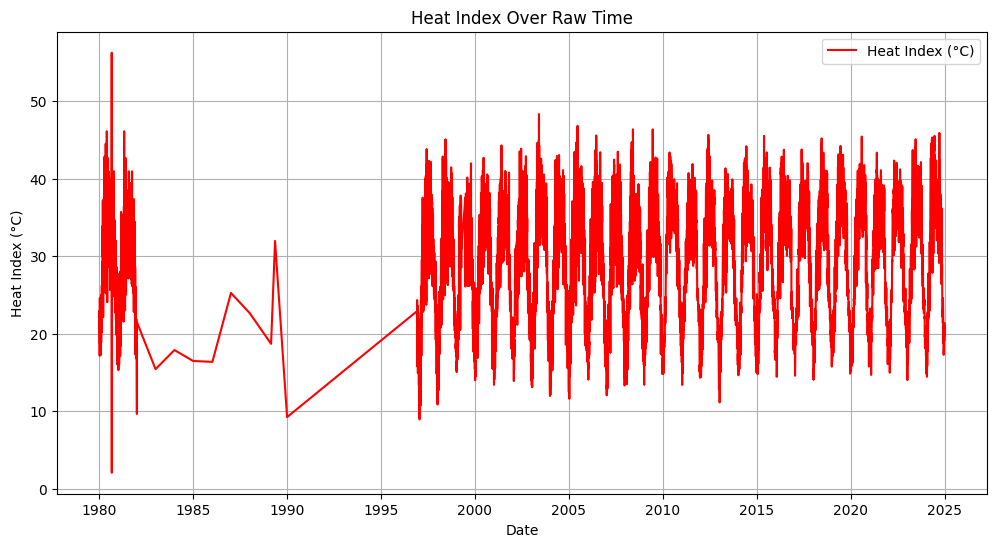

In [59]:
# heat index plot graph lineplot with datetime on x axis and heat index on y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI['date'], with_no_null_HI['heat_index_C'], label='Heat Index (°C)', color='red')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Raw Time')
plt.legend()
plt.grid()
plt.show()

## setting conditions

In [45]:
import numpy as np
import pandas as pd

# Assuming 'with_no_null_HI.heat_index_C' is a Pandas Series
df_HI_values = with_no_null_HI.heat_index_C.copy() 

conditions = [
    (df_HI_values >= 129),
    (df_HI_values >= 105) & (df_HI_values < 129),
    (df_HI_values >= 89.6) & (df_HI_values < 105),
    (df_HI_values >= 80.6) & (df_HI_values < 89.6),
    (df_HI_values < 80.6),
]

choices = [
    'Extreme Danger',
    'Danger',
    'Extreme Caution',
    'Caution',
    'Comfortable',
]

# Use np.select to generate the severity levels (this is a NumPy array)
severity_array = np.select(conditions, choices, default='Unknown')

# Convert the array to a Pandas Series with the original index for easy viewing/joining
df_HI_severity = pd.Series(severity_array, index=df_HI_values.index, name='Heat_Severity')

# Now you can use .head() on the new Pandas Series
print(df_HI_severity)

0        Comfortable
1        Comfortable
2        Comfortable
3        Comfortable
4        Comfortable
            ...     
16432    Comfortable
16433    Comfortable
16434    Comfortable
16435    Comfortable
16436    Comfortable
Name: Heat_Severity, Length: 10478, dtype: object


In [48]:
# count the number of occurrences of each severity level per year
df_with_severity = with_no_null_HI.copy()
df_with_severity['Heat_Severity'] = df_HI_severity
df_with_severity['year'] = df_with_severity['date'].dt.year
severity_counts = df_with_severity.groupby(['year', 'Heat_Severity']).size().unstack(fill_value=0)
print(severity_counts.head())

Heat_Severity  Comfortable
year                      
1980                   322
1981                   248
1982                     2
1983                     1
1984                     1


# For the best performer predicted model (XGBoost)

In [51]:
xgboost_forecast_out.head()

,date,year,month,day,pred_heat_index_C,temperature(degree C),humidity
0,2025-01-01,2025,1,1,17.962540,18.087500,80.953125
1,2025-01-02,2025,1,2,18.359507,18.325806,80.890323
2,2025-01-03,2025,1,3,18.114986,18.157576,81.527273
3,2025-01-04,2025,1,4,17.853981,17.906452,80.577419
4,2025-01-05,2025,1,5,17.340868,17.492857,82.364286


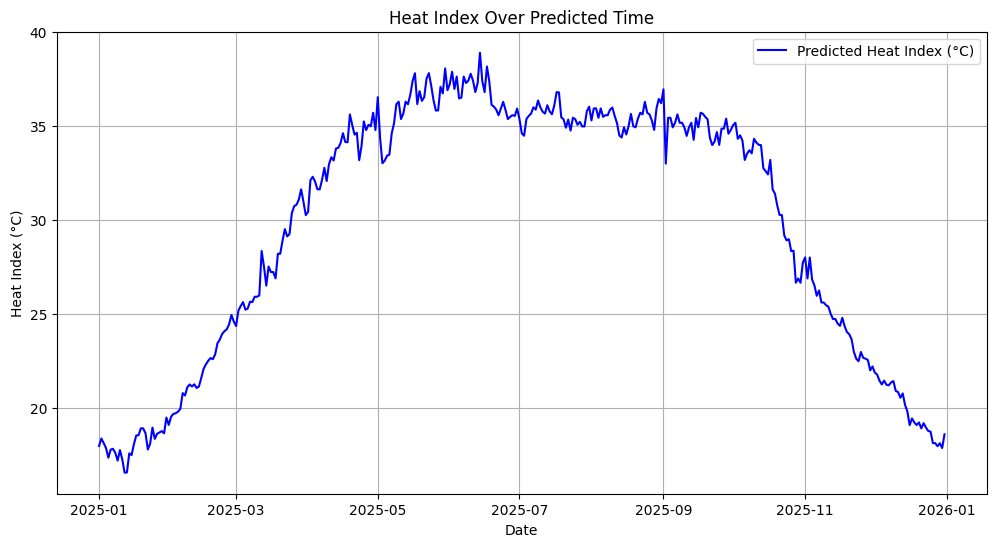

In [58]:
# heat index plot graph lineplot with datetime on x axis and heat index on y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(xgboost_forecast_out['date'], xgboost_forecast_out['pred_heat_index_C'], label='Predicted Heat Index (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Predicted Time')
plt.legend()
plt.grid()
plt.show()

In [57]:
df_HI_values_predicted = xgboost_forecast_out.pred_heat_index_C.copy() 

conditions = [
    (df_HI_values_predicted >= 129),
    (df_HI_values_predicted >= 105) & (df_HI_values_predicted < 129),
    (df_HI_values_predicted >= 89.6) & (df_HI_values_predicted < 105),
    (df_HI_values_predicted >= 80.6) & (df_HI_values_predicted < 89.6),
    # FIX: Changed 'df_HI_values' to 'df_HI_values_predicted'
    (df_HI_values_predicted < 80.6), 
]

choices = [
    'Extreme Danger',
    'Danger',
    'Extreme Caution',
    'Caution',
    'Comfortable',
]

# Use np.select to generate the severity levels (all conditions now have shape (365,))
severity_array_predicted = np.select(conditions, choices, default='Unknown')

# Convert the array to a Pandas Series with the original index
df_HI_severity_predicted = pd.Series(
    severity_array_predicted, 
    index=df_HI_values_predicted.index, 
    name='Heat_Severity_Predicted'
)

# This will now successfully print the head of the new Pandas Series
print(df_HI_severity_predicted.head(10))

0    Comfortable
1    Comfortable
2    Comfortable
3    Comfortable
4    Comfortable
5    Comfortable
6    Comfortable
7    Comfortable
8    Comfortable
9    Comfortable
Name: Heat_Severity_Predicted, dtype: object


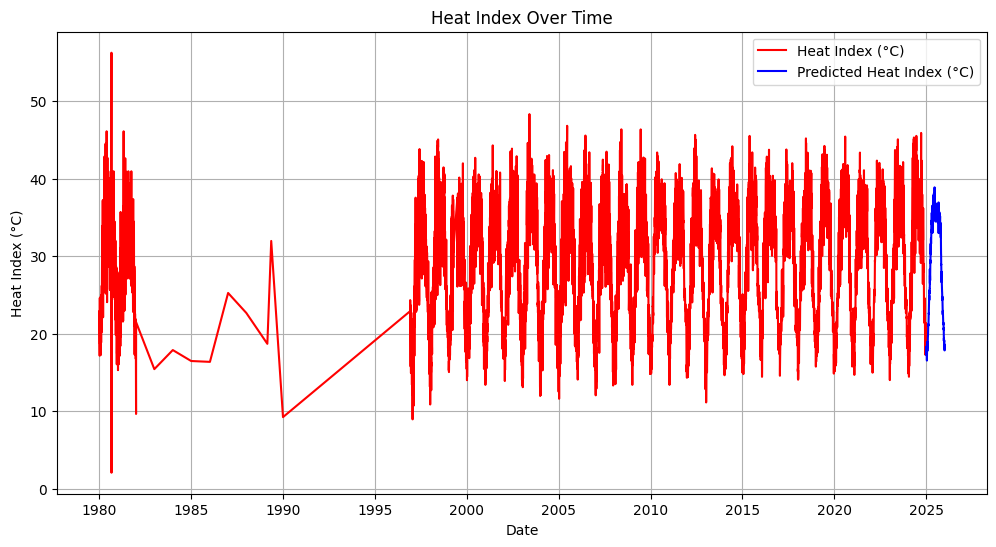

In [60]:
# merge the 'Heat Index Over Raw Time' and the 'Heat Index Over Predicted Time' plots into one plot for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI['date'], with_no_null_HI['heat_index_C'], label='Heat Index (°C)', color='red')
plt.plot(xgboost_forecast_out['date'], xgboost_forecast_out['pred_heat_index_C'], label='Predicted Heat Index (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Time')
plt.legend()
plt.grid()
plt.show()

# OUTCOME:
 we can do two things :
 ## show the analysis from the graph
 - when bad beats good lots of times continuously then say from that year inititation of unsurviveness.
 ## shhow via random forest if linearly 
 - x train  = no of good and no of bad
 - y train  = years ( if no of bad is geater for 3 consicutive years then thats the start of unsuriving years)